# Wine Quality - Comparison of GMM, KNN and AE results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff 
from sklearn import preprocessing
import pickle
from utils.utils_gmm import *
import matplotlib.transforms as mtrans

sns.set()

In [17]:
SMALL_SIZE = 8
MEDIUM_SIZE = 13
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()

knn_results = pd.read_csv("results/knn_wine_quality_scored.csv", index_col=0)
knn_distances = pd.read_csv("results/knn_wine_quality_distances.csv", index_col=0)
#knn_distances = knn_distances / np.max(knn_distances.values)

gm_results = pd.read_csv("results/gmm_wine_quality_scored.csv", index_col=0)
gm_distances = pd.read_csv("results/gmm_wine_quality_distances.csv", index_col=0)
#gm_distances = gm_distances / np.max(gm_distances.values)

ae_results = pd.read_csv("results/ae_wine_quality_scored.csv", index_col=0)
ae_distances = pd.read_csv("results/ae_wine_quality_distances.csv", index_col=0)
#ae_distances = ae_distances / np.max(ae_distances.values)

df = pd.read_csv("data/wine_quality.csv", index_col=0)
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [19]:
# and later you can load it
with open('results/gmm_wine_quality.pkl', 'rb') as f:
    gmm = pickle.load(f)
with open('results/neighbors_wine_quality.pkl', 'rb') as f:
    neighbors = pickle.load(f)

gmm, neighbors.shape

(GaussianMixture(n_components=3, random_state=42), (4871, 44))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


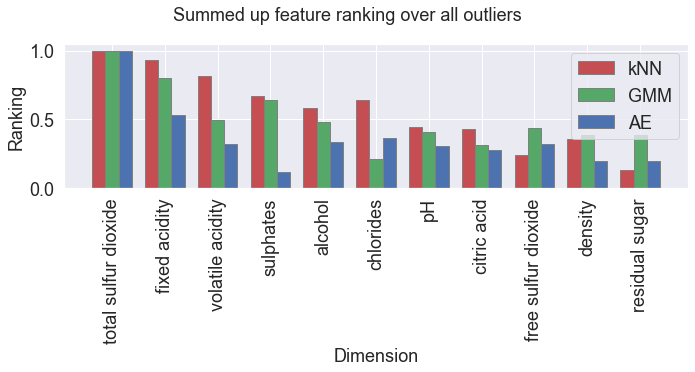

In [20]:
# plot the summed up feature ranking for all 50 outliers
barWidth = 0.25
fig, ax = plt.subplots(1, 1, figsize=(10,5))

# set height of bar
knn = knn_distances.sum().values
knn = knn / knn.max()
gm = gm_distances.sum().values
gm = gm / gm.max()
ae = ae_distances.sum().values
ae = ae / ae.max()

sort_indx = np.argsort((ae + knn + gm) * -1)

# Set position of bar on X axis
br1 = np.arange(len(knn))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
ax.bar(br1, knn[sort_indx], color ='r', width = barWidth,
        edgecolor ='grey', label ='kNN')
ax.bar(br2, gm[sort_indx], color ='g', width = barWidth,
        edgecolor ='grey', label ='GMM')
ax.bar(br3, ae[sort_indx], color ='b', width = barWidth,
        edgecolor ='grey', label ='AE')

# Adding Xticks
ax.set_xlabel('Dimension')
ax.set_ylabel('Ranking')
#ax.set_ylim([0, 1.03])
ax.set_xticks([r + barWidth for r in range(len(knn))])
ax.set_xticklabels(knn_distances.columns[sort_indx], rotation=90)
ax.legend()
fig.suptitle("Summed up feature ranking over all outliers", y=1.05)
#ax.set_yticklabels([])

fig.tight_layout()
plt.savefig("images/wine_quality_data_ranking.eps", bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


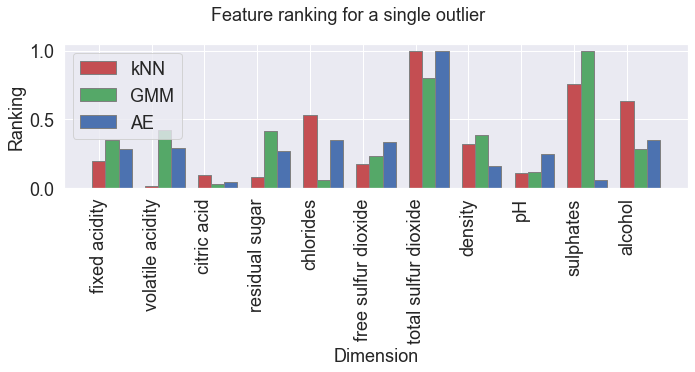

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


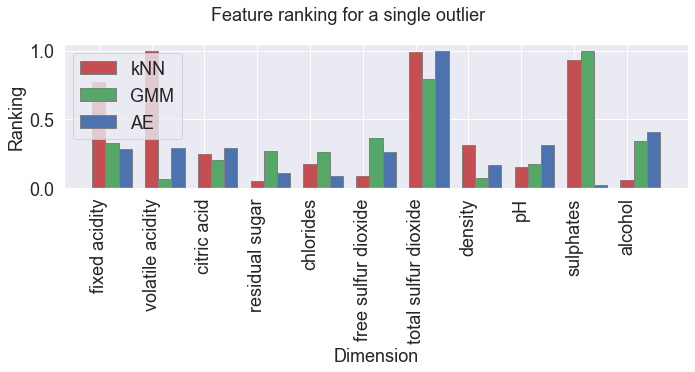

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


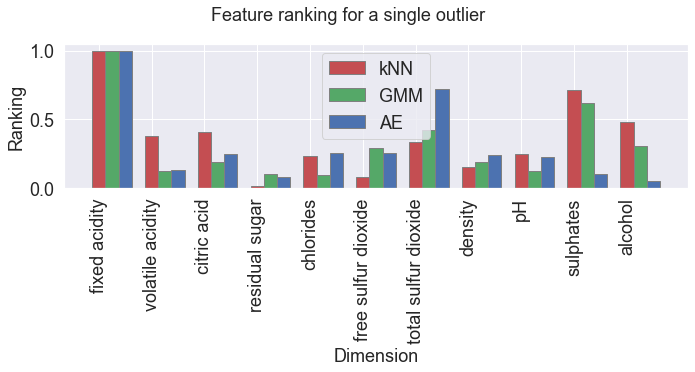

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


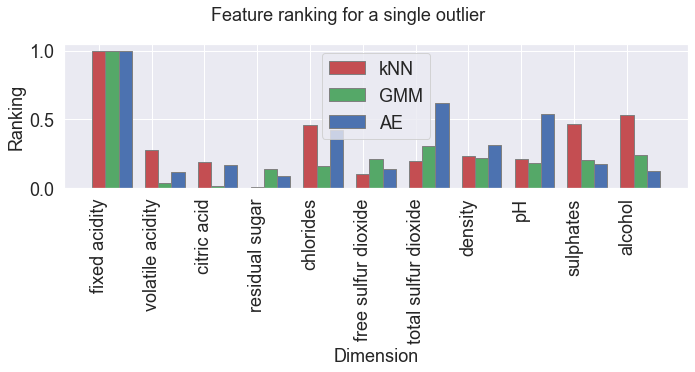

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


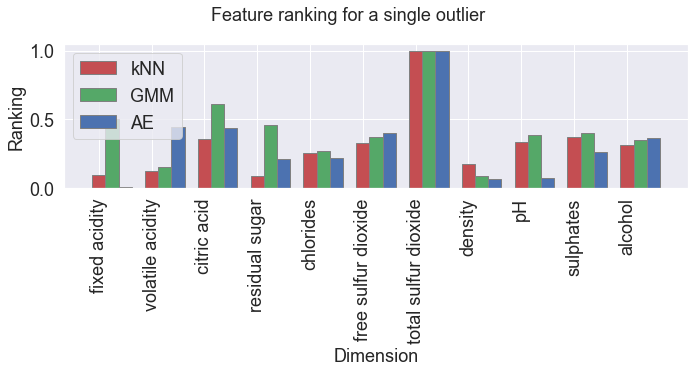

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


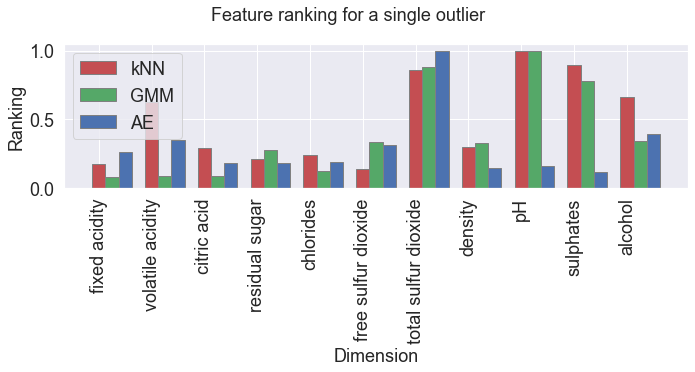

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


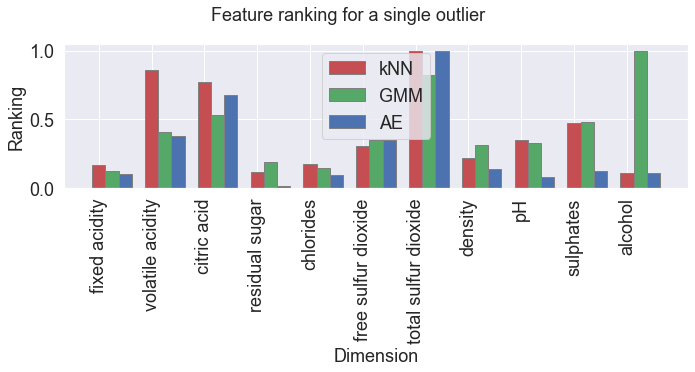

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


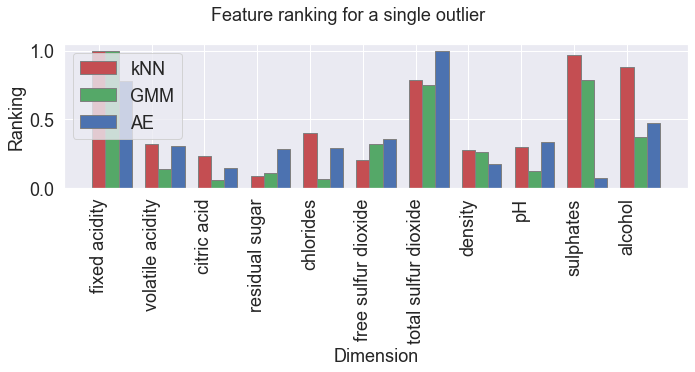

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


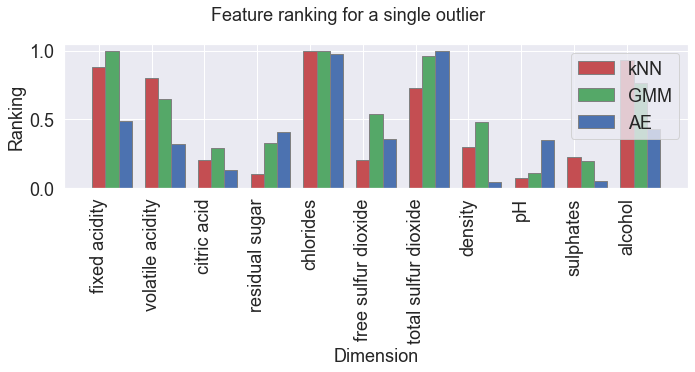

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


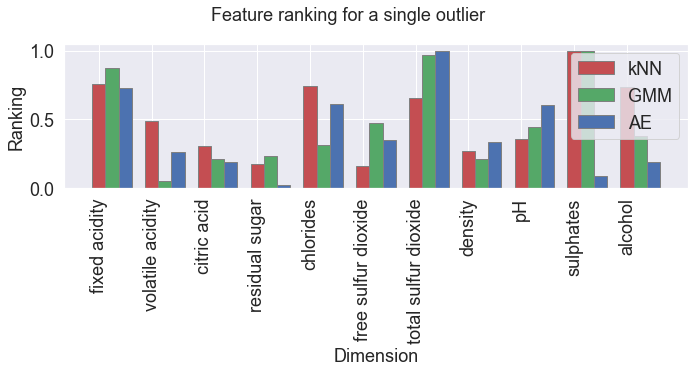

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


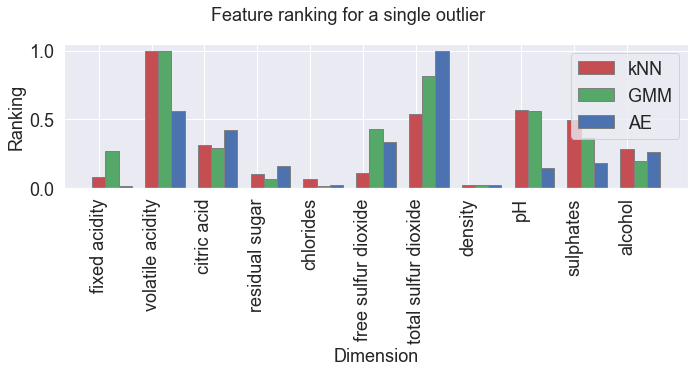

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


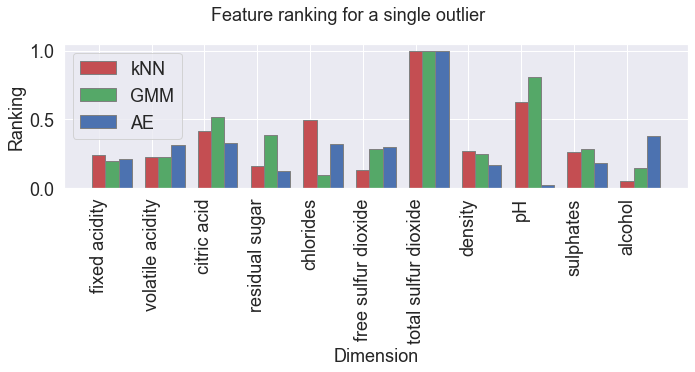

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


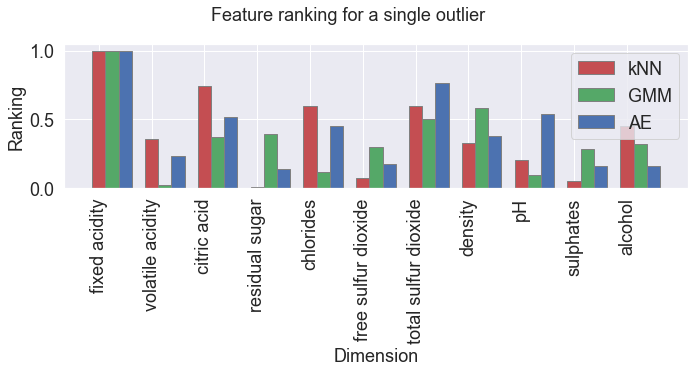

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


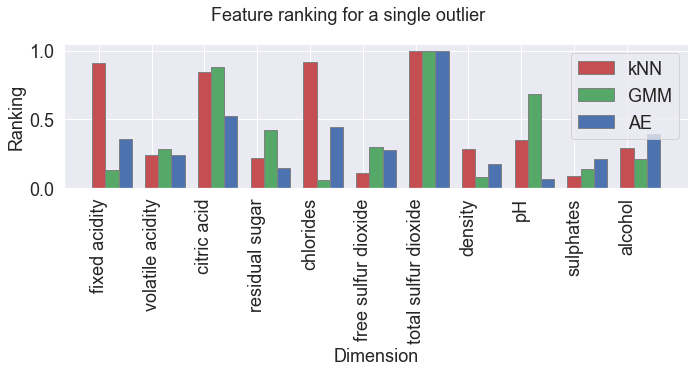

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


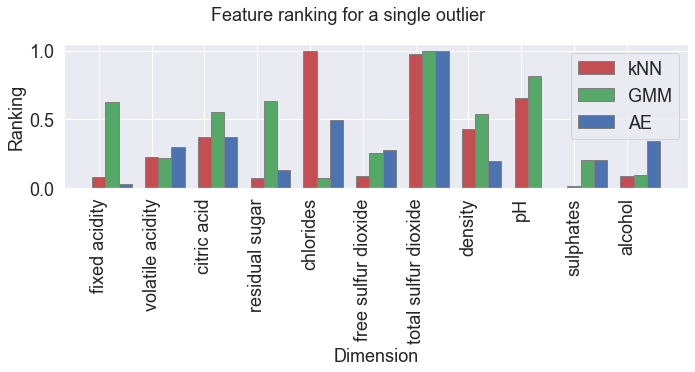

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


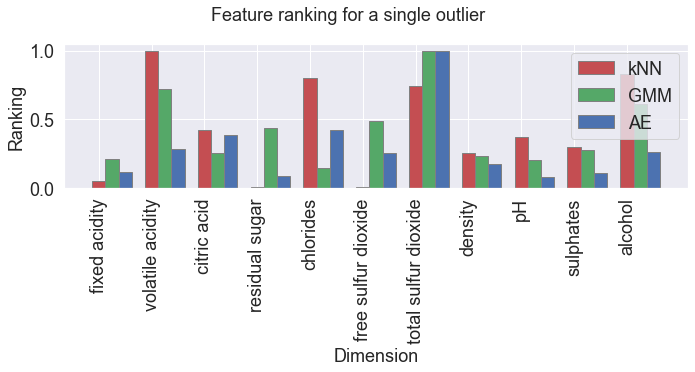

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


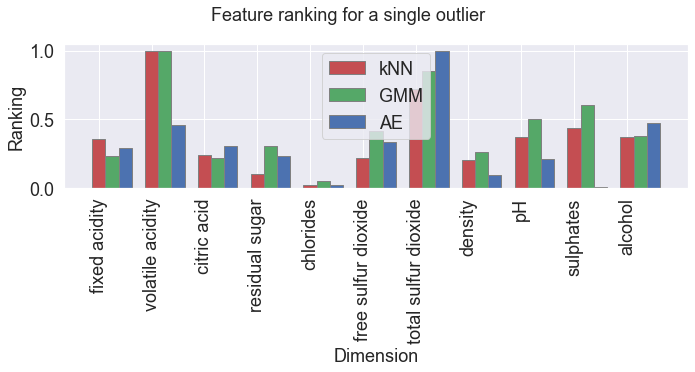

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


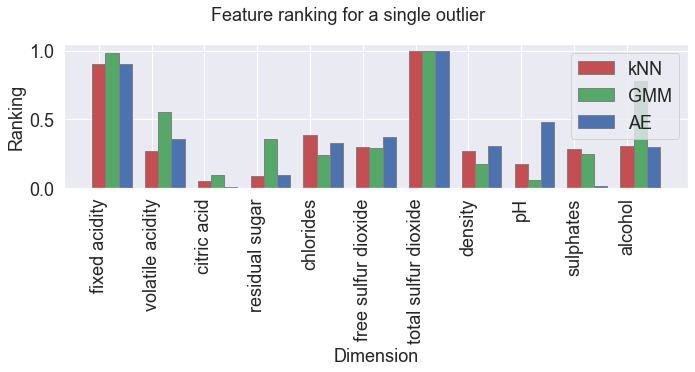

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


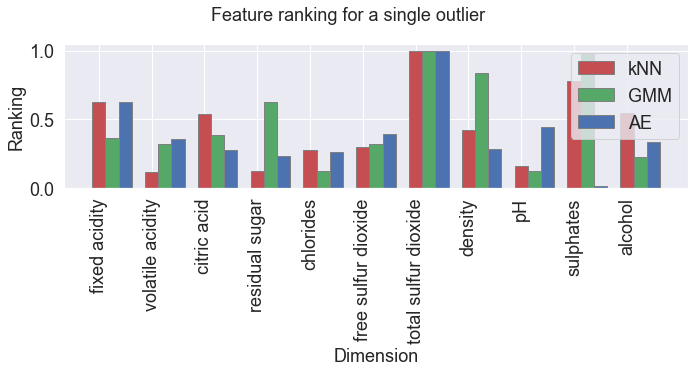

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


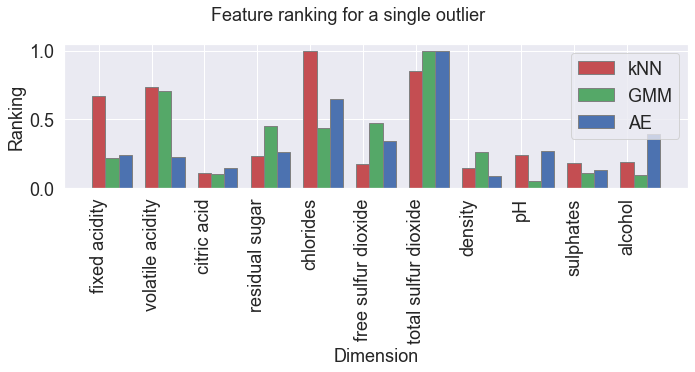

In [21]:
# plot feature ranking for individual outliers
for i in knn_distances.index.values[:20]:
    barWidth = 0.25
    fig, ax = plt.subplots(1, 1, figsize=(10,5))

    outlier_idx = i

    # set height of bar
    knn = knn_distances.loc[outlier_idx].values
    knn = knn / np.max(knn)
    gm = gm_distances.loc[outlier_idx].values
    gm = gm / np.max(gm)
    ae = ae_distances.loc[outlier_idx].values
    ae = ae / np.max(ae)

    # Set position of bar on X axis
    br1 = np.arange(len(knn))
    br2 = [x + barWidth for x in br1]
    br3 = [x + barWidth for x in br2]

    # Make the plot
    ax.bar(br1, knn, color ='r', width = barWidth,
            edgecolor ='grey', label ='kNN')
    ax.bar(br2, gm, color ='g', width = barWidth,
            edgecolor ='grey', label ='GMM')
    ax.bar(br3, ae, color ='b', width = barWidth,
            edgecolor ='grey', label ='AE')

    # Adding Xticks
    ax.set_xlabel('Dimension')
    ax.set_ylabel('Ranking')
    #ax.set_ylim([0, 1.03])
    ax.set_xticks([r for r in range(len(knn))])
    ax.legend()
    fig.suptitle("Feature ranking for a single outlier", y=1.05)
    ax.set_xticklabels(knn_distances.columns, rotation=90)

    fig.tight_layout()
    plt.savefig(f"images/synthetic_data_ranking_outlier_{outlier_idx}.eps", bbox_inches="tight")
    plt.show()

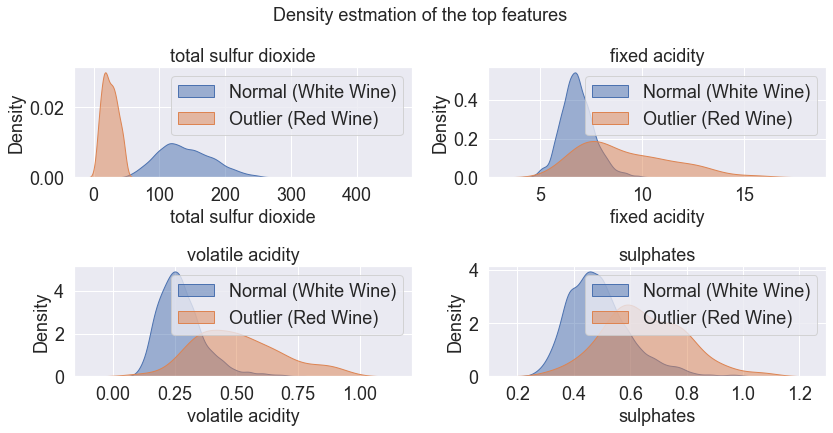

In [22]:
# plot the density estimation of the top ranked features for the inlier and outlier class
fig, axes = plt.subplots(2, 2, figsize=(12, 5.8))

columns = ["total sulfur dioxide", "fixed acidity", "volatile acidity", "sulphates"]

for ax, c in zip(axes.flatten(), columns):
    sns.kdeplot(data=df[df["type"] == "white"], x=c, ax=ax, alpha=.5, fill=True, label="Normal (White Wine)",  bw_adjust=.9)
    sns.kdeplot(data=df[df["type"] == "red"], x=c, ax=ax, alpha=.5, fill=True, label="Outlier (Red Wine)",   bw_adjust=.9)
    ax.legend()
    ax.set_title(c)
fig.suptitle("Density estmation of the top features", y=1.05)
fig.tight_layout()
plt.savefig("images/wine_quality_top_feature_density.svg", bbox_inches="tight")
plt.show()

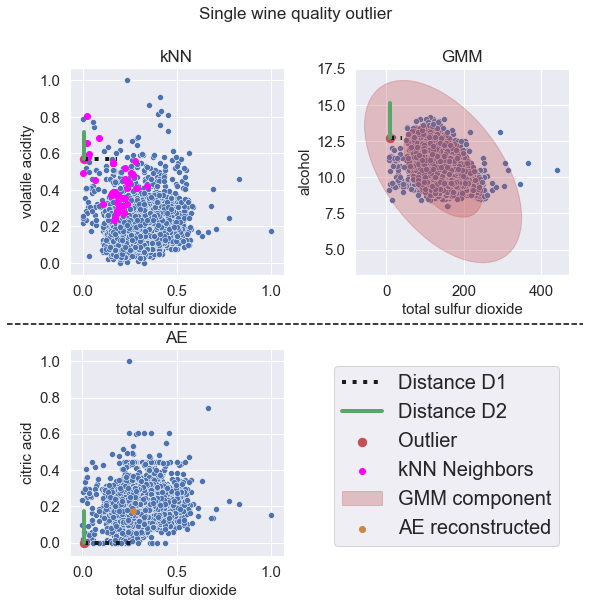

In [48]:
#plot the feature ranking as dista
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.flatten()

idx = 4827

columns = [["total sulfur dioxide", "volatile acidity"],["total sulfur dioxide", "alcohol"], ["total sulfur dioxide", "citric acid"]]

fig.suptitle("Single wine quality outlier", y=1.05)

for ax, distances, approach, cs in zip(axes, [knn_distances, gm_distances, ae_distances], ["kNN", "GMM", "AE"], columns):
    columns = df.columns[1:]
    col_1_idx = np.argsort(columns == cs[0])[-1]
    col_2_idx = np.argsort(columns == cs[1])[-1]
    data_values = df[df.columns[1:]].copy()
    if approach == "GMM":
        cols = [col_1_idx, col_2_idx]
        w_factor = 0.5 / gmm.weights_.max()
        c = 0
        for _, (pos, covar, w) in enumerate(zip(gmm.means_[[c]][:, cols], gmm.covariances_[[c]][:, cols, :][:, :, cols], gmm.weights_[[c]])):
            draw_ellipse(pos, covar, alpha=0.3, ax=ax, c="r", nr_patches=3, label="GMM component")
    else:
        data_values = pd.DataFrame(min_max_scaler.fit_transform(df[df.columns[1:]].values), columns=df.columns[1:])
    sns.scatterplot(data=data_values[cs], x=cs[0], y=cs[1], ax=ax)
    point = data_values.loc[idx][[cs[0], cs[1]]].values
    dist = distances.loc[idx][[cs[0], cs[1]]].values
    if approach == "GMM":
        dist[0] = dist[0] * 15
    ax.plot([point[0],point[0]+dist[0]], [point[1],point[1]], c="k", linestyle='dotted', lw=4, label="Distance D1")
    ax.plot([point[0],point[0]], [point[1],point[1]+dist[1]], c="g", lw=4, label="Distance D2")
    ax.scatter(data_values.loc[idx][cs[0]], data_values.loc[idx][cs[1]], c="r", label="Outlier", s=70)
    if approach == "kNN":
        ax.scatter(data_values.iloc[neighbors[idx]][cs[0]], data_values.iloc[neighbors[idx]][cs[1]], c="magenta", label="kNN Neighbors")
        
    if approach == "AE":
        rec_x = point[0]+dist[0]
        rec_y = point[1]+dist[1]
        ax.scatter([rec_x], [rec_y], c="peru", label="AE reconstructed")

    ax.set_title(approach)
    #ax.legend(loc="upper left")

obj = []
desc = []
obj.extend(axes[0].get_legend_handles_labels()[0])
desc.extend(axes[0].get_legend_handles_labels()[1])
obj.append(axes[1].get_legend_handles_labels()[0][2])
desc.append(axes[1].get_legend_handles_labels()[1][2])
obj.append(axes[2].get_legend_handles_labels()[0][3])
desc.append(axes[2].get_legend_handles_labels()[1][3])
axes[-1].axis('off')
axes[-1].legend(obj, desc, loc='lower right', prop={'size': 20})
axes[1].get_legend().remove()
fig.tight_layout()

axes = axes.reshape(2, 2)
# Get the bounding boxes of the axes including text decorations
r = fig.canvas.get_renderer()
get_bbox = lambda ax: ax.get_tightbbox(r).transformed(fig.transFigure.inverted())
bboxes = np.array(list(map(get_bbox, axes.flat)), mtrans.Bbox).reshape(axes.shape)

#Get the minimum and maximum extent, get the coordinate half-way between those
ymax = np.array(list(map(lambda b: b.y1, bboxes.flat))).reshape(axes.shape).max(axis=1)
ymin = np.array(list(map(lambda b: b.y0, bboxes.flat))).reshape(axes.shape).min(axis=1)
ys = np.c_[ymax[1:], ymin[:-1]].mean(axis=1)

# Draw a horizontal lines at those coordinates
for y in ys:
    line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black", linestyle="--")
    fig.add_artist(line)

plt.savefig("images/wine_quality_outlier_4827.svg", bbox_inches="tight")
plt.show()
